# Titanic Regresion Lineal

### 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc. 

In [48]:
# Importar las librerias
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report
from sklearn.impute import SimpleImputer

In [40]:
# Importar el dataset
datos = pd.read_csv('Titanic-Dataset.csv') 

In [20]:
# Visualizar las primeras filas
print("Visualización de las primeras Filas")

print(datos.head())

# Estadísticas descriptivas
print("Estadisticas descriptivas")

print(datos.describe())



Visualización de las primeras Filas
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0           

Histogramas para todas las caracteristicas


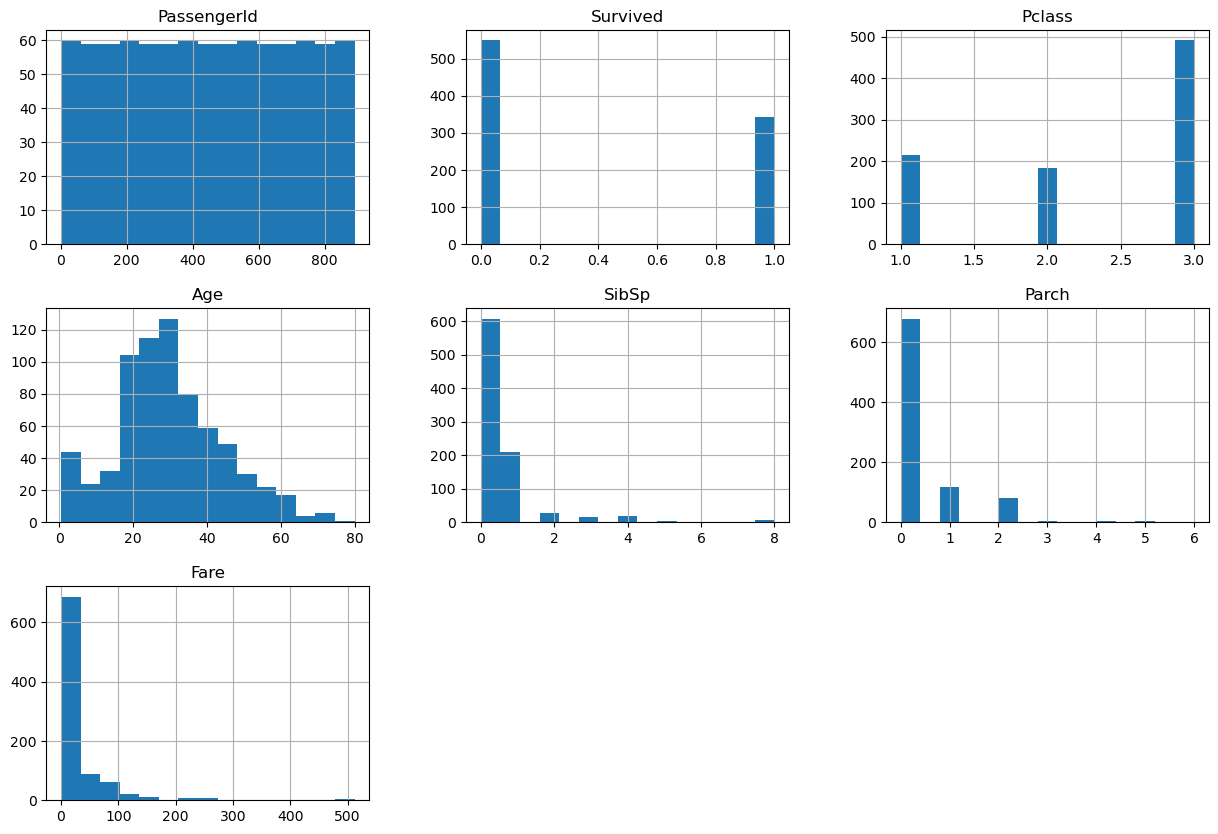

Boxplots para detectar Valores Atipicos


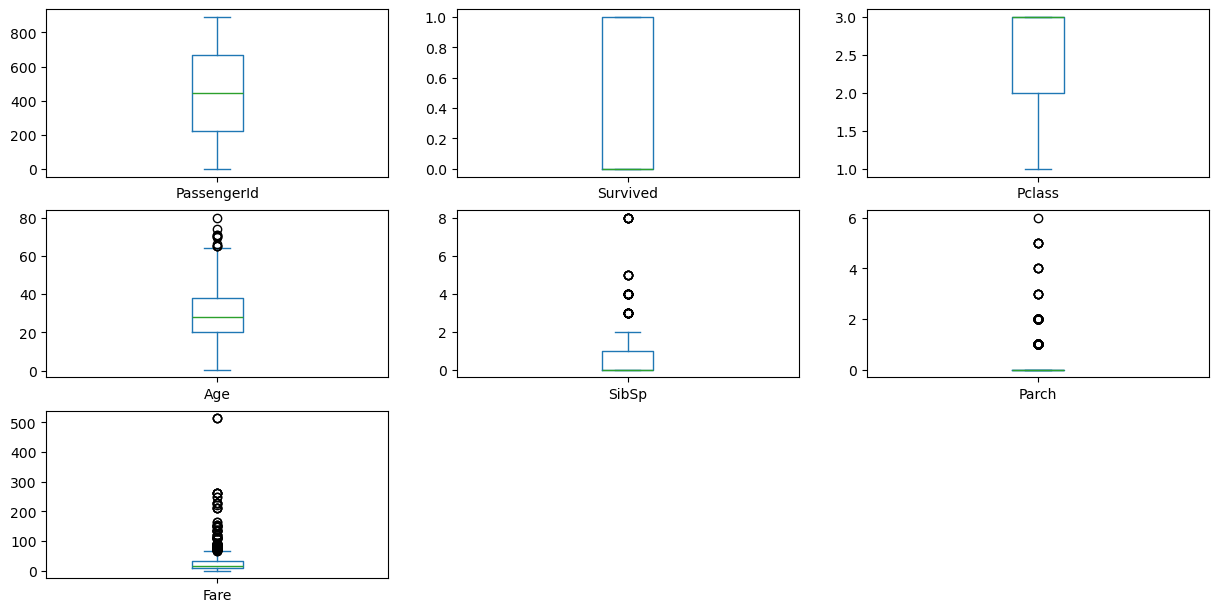

In [21]:
# Histogramas de todas las características
print("Histogramas para todas las caracteristicas")

datos.hist(bins=15, figsize=(15, 10))
plt.show()

# Boxplots para detectar valores atípicos

print("Boxplots para detectar Valores Atipicos")

datos.plot(kind='box', subplots=True, layout=(4,3), figsize=(15, 10), sharex=False, sharey=False)
plt.show()

Matriz de Correlación


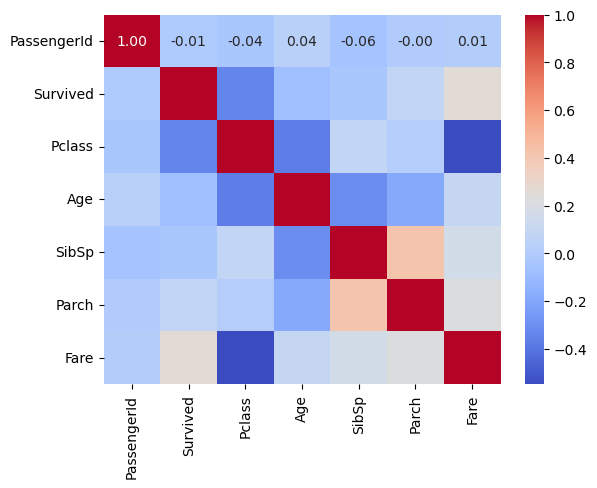

In [22]:
# Eliminar columnas no numéricas antes de calcular la matriz de correlación
datos_numericos = datos.select_dtypes(include=['float64', 'int64'])

# Matriz de correlación
print("Matriz de Correlación")
matriz_corr = datos_numericos.corr()
sns.heatmap(matriz_corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

### 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario. 

In [23]:
#Revision del tipo de datos y datos faltantes
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [24]:
# Identificar columnas con datos faltantes
columnas_con_faltantes = datos.columns[datos.isnull().any()]
print("Columnas con datos faltantes:")
print(columnas_con_faltantes)

Columnas con datos faltantes:
Index(['Age', 'Cabin', 'Embarked'], dtype='object')


In [25]:
# Corrigeremos cada una de los datos faltantes en las columas segun su caso. 
# Calcular la media de la columna 'Age'
media_edad = datos['Age'].mean()
# Imputar la media en los valores faltantes de la columna 'Age'
datos['Age'].fillna(media_edad, inplace=True)
# Imputar un valor constante para los datos faltantes en la columna 'Cabin'
datos['Cabin'].fillna('Desconocido', inplace=True)
# Calcular la moda de la columna 'Embarked'
moda_embarked = datos['Embarked'].mode()[0]
# Imputar la moda en los valores faltantes de la columna 'Embarked'
datos['Embarked'].fillna(moda_embarked, inplace=True)
# Revisar nuevamente la información del DataFrame después de las correcciones
print(datos.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


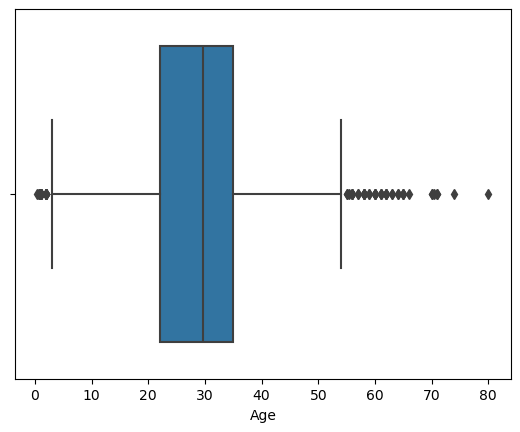

In [26]:
# Visualización de valores atípicos (ejemplo con la columna 'Age')
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=datos['Age'])
plt.show()

In [27]:
# Eliminar filas con valores atípicos en la columna 'Age' que estén por encima del percentil 99
percentil_99 = datos['Age'].quantile(0.99)
datos_sin_atipicos = datos[datos['Age'] <= percentil_99]
# Aplicar una transformación logarítmica a la columna 'Fare'
import numpy as np
datos['Fare_transformado'] = np.log(datos['Fare'] + 1)
# Reemplazar valores atípicos en la columna 'Fare' con el percentil 99
percentil_99_fare = datos['Fare'].quantile(0.99)
datos['Fare'] = np.where(datos['Fare'] > percentil_99_fare, percentil_99_fare, datos['Fare'])

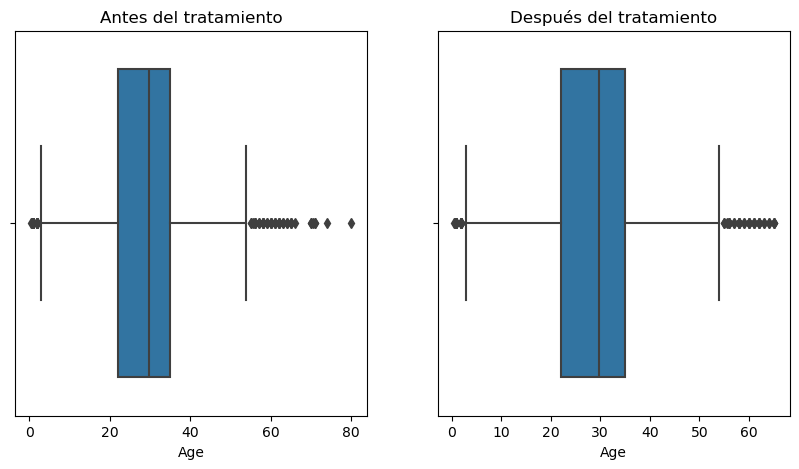

In [28]:
# Visualización de diagramas de caja antes y después del tratamiento de valores atípicos en la columna 'Age'
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x=datos['Age'])
plt.title('Antes del tratamiento')

plt.subplot(1, 2, 2)
sns.boxplot(x=datos_sin_atipicos['Age'])  # Usando los datos sin valores atípicos
plt.title('Después del tratamiento')

plt.show()


### 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.

In [32]:
# Eliminar las columnas no numéricas y la variable objetivo 'Survived'
X = datos.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Survived'], axis=1)

# Estandarizar las características numéricas
escalador = StandardScaler()
k = 5
X_escalado = pd.DataFrame(escalador.fit_transform(X), columns=X.columns)

# Seleccionar las características más relevantes
selector = SelectKBest(f_classif, k=5)  # Selecciona las 5 mejores características, ajusta k según sea necesario
X_seleccionado = selector.fit_transform(X_escalado, datos['Survived'])

# Obtener los nombres de las características seleccionadas
caracteristicas_seleccionadas = X_escalado.columns[selector.get_support()]

print("Características seleccionadas:")
print(caracteristicas_seleccionadas)

Características seleccionadas:
Index(['Pclass', 'Age', 'Parch', 'Fare', 'Fare_transformado'], dtype='object')


In [33]:
# Imprimir las características seleccionadas y sus puntuaciones
print(f"Características seleccionadas ({k}):")
for caracteristica, puntuacion in zip(caracteristicas_seleccionadas, selector.scores_[selector.get_support()]):
    print(f"{caracteristica}: {puntuacion:.2f}")

Características seleccionadas (5):
Pclass: 115.03
Age: 4.35
Parch: 5.96
Fare: 71.60
Fare_transformado: 108.54


### 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.

In [34]:
from sklearn.model_selection import train_test_split

# Dividir el conjunto de datos en características (X) y variable objetivo (y)
X = datos.drop(['Survived'], axis=1)
y = datos['Survived']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# La opción 'test_size' indica el porcentaje de datos que se utilizarán para el conjunto de prueba (en este caso, 20%)
# 'random_state' se utiliza para garantizar que la división sea reproducible

# Imprimir las formas de los conjuntos de entrenamiento y prueba
print("Forma de X_train:", X_train.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de y_test:", y_test.shape)

Forma de X_train: (712, 12)
Forma de X_test: (179, 12)
Forma de y_train: (712,)
Forma de y_test: (179,)


In [35]:
# Impresiones para confirmar el tamaño de los conjuntos
print(f'Tamaño total del conjunto de datos: {len(datos)}')
print(f'Tamaño del conjunto de entrenamiento: {len(X_train)} ({(len(X_train) / len(datos) * 100):.2f}%)')
print(f'Tamaño del conjunto de prueba: {len(X_test)} ({(len(X_test) / len(datos) * 100):.2f}%)')

Tamaño total del conjunto de datos: 891
Tamaño del conjunto de entrenamiento: 712 (79.91%)
Tamaño del conjunto de prueba: 179 (20.09%)


### 5. Entrenar el modelo configurando los diferentes hiperparámetros.

In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Dividir el conjunto de datos en características y variable objetivo
X = datos.drop(['Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = datos['Survived']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir las transformaciones para las características numéricas y categóricas
numeric_features = ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
categorical_features = ['Sex', 'Embarked']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combinar las transformaciones en un preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Crear un pipeline con el preprocesador y el modelo de regresión lineal
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', LinearRegression())])

# Entrenar el modelo
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['PassengerId', 'Pclass',
                                                   'Age', 'SibSp', 'Parch',
                                                   'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Sex', 'Embarked'])])),
                ('regressor', LinearRegression())])

### 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.


In [49]:
X = datos.drop(columns=['Survived'])
y = datos['Survived']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
# Identificar las columnas numéricas y categóricas
columnas_numericas = X.select_dtypes(include=['int64', 'float64']).columns
columnas_categoricas = X.select_dtypes(include=['object']).columns

# Crear un transformador para preprocesar las características
preprocesador = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),  # Imputar valores faltantes con la media
            ('scaler', StandardScaler())
        ]), columnas_numericas),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputar valores faltantes con la moda
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), columnas_categoricas)
    ])

In [51]:
# Crear una tubería que incluya el preprocesador y el selector de características
pipeline = Pipeline(steps=[
    ('preprocesador', preprocesador),
    ('selector', SelectKBest(f_classif, k=5))
])

# Ajustar la tubería en el conjunto de entrenamiento
X_train_preprocesado = pipeline.fit_transform(X_train, y_train)
X_test_preprocesado = pipeline.transform(X_test)

In [52]:
modelo = RandomForestClassifier(random_state=42)
modelo.fit(X_train_preprocesado, y_train)

RandomForestClassifier(random_state=42)

In [53]:
# Hacer predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test_preprocesado)

# Calcular métricas de evaluación
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Imprimir las métricas
print(f"Precisión: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"Exactitud: {accuracy:.2f}")

# Reporte de clasificación
print(classification_report(y_test, y_pred))

Precisión: 0.79
Recall: 0.76
F1-Score: 0.77
Exactitud: 0.82
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       105
           1       0.79      0.76      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.81      0.82      0.82       179



### 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

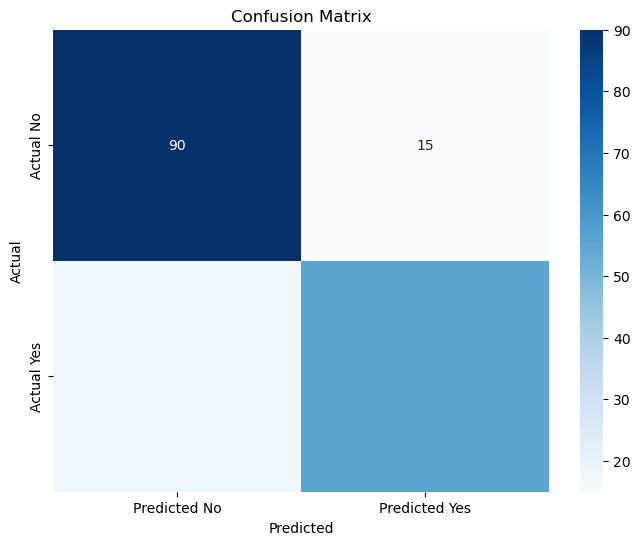

In [55]:
from sklearn.metrics import confusion_matrix
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

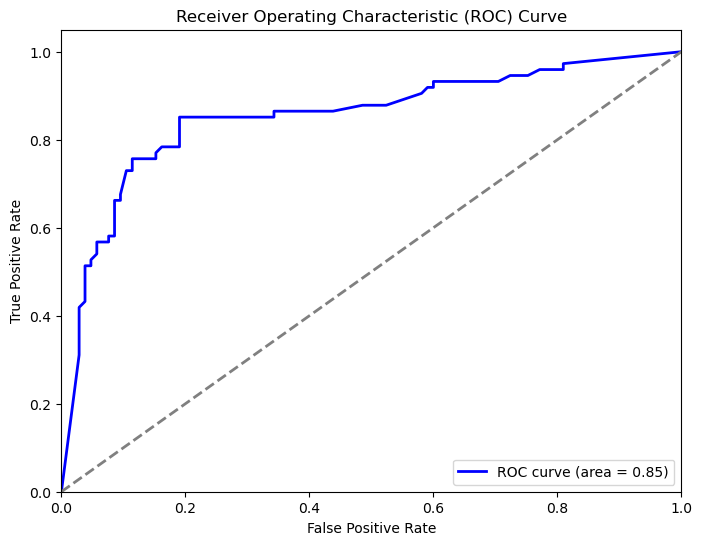

In [56]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calcular las probabilidades de predicción
y_prob = modelo.predict_proba(X_test_preprocesado)[:, 1]

# Calcular la curva ROC y el AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

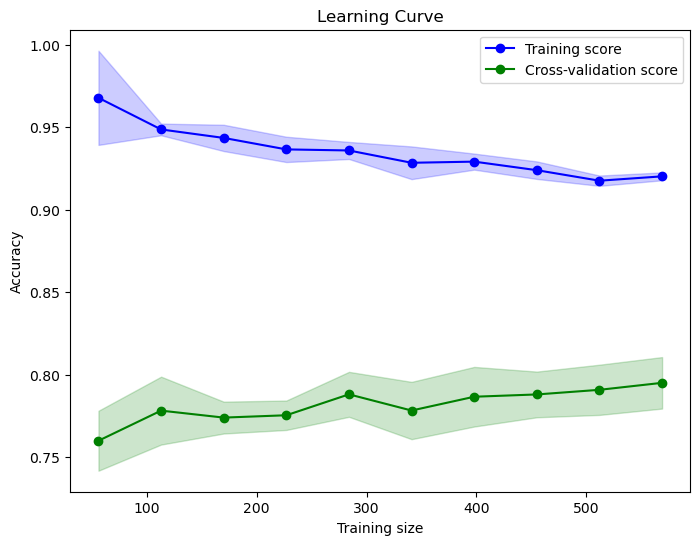

In [60]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(modelo, X_train_preprocesado, y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training score')
plt.plot(train_sizes, test_mean, 'o-', color='green', label='Cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.2)
plt.xlabel('Training size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.show()

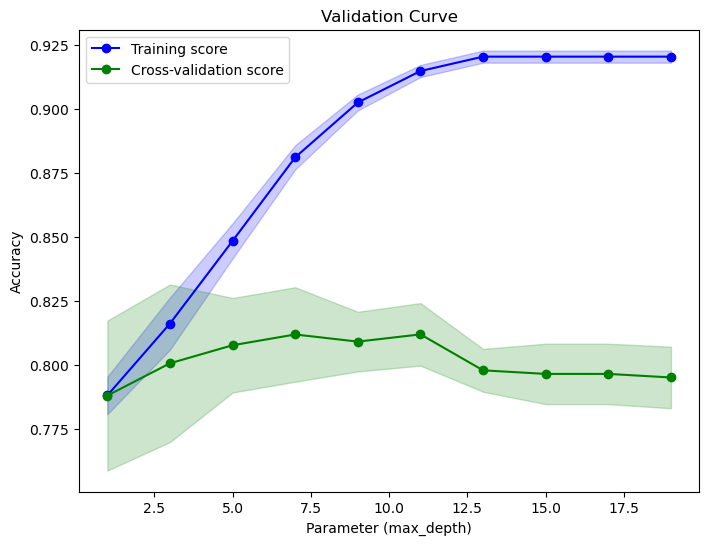

In [61]:
from sklearn.model_selection import validation_curve

param_range = np.arange(1, 21, 2)
train_scores, test_scores = validation_curve(modelo, X_train_preprocesado, y_train, param_name='max_depth', param_range=param_range, cv=5, scoring='accuracy', n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(param_range, train_mean, 'o-', color='blue', label='Training score')
plt.plot(param_range, test_mean, 'o-', color='green', label='Cross-validation score')
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color='green', alpha=0.2)
plt.xlabel('Parameter (max_depth)')
plt.ylabel('Accuracy')
plt.title('Validation Curve')
plt.legend(loc='best')
plt.show()

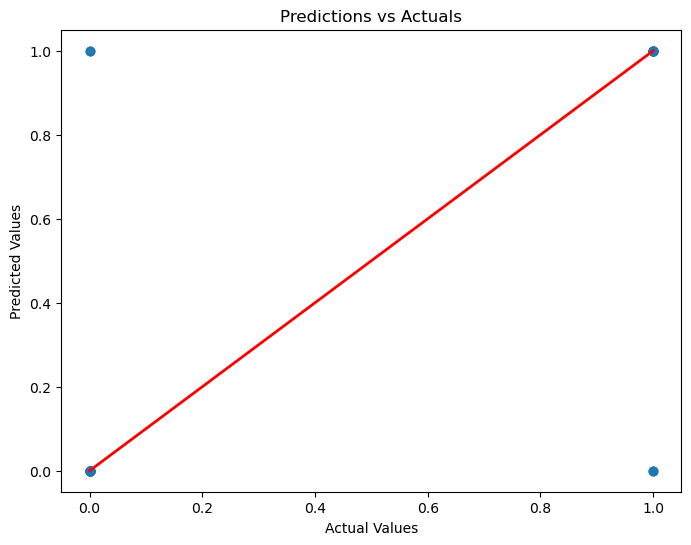

In [62]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predictions vs Actuals')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.show()

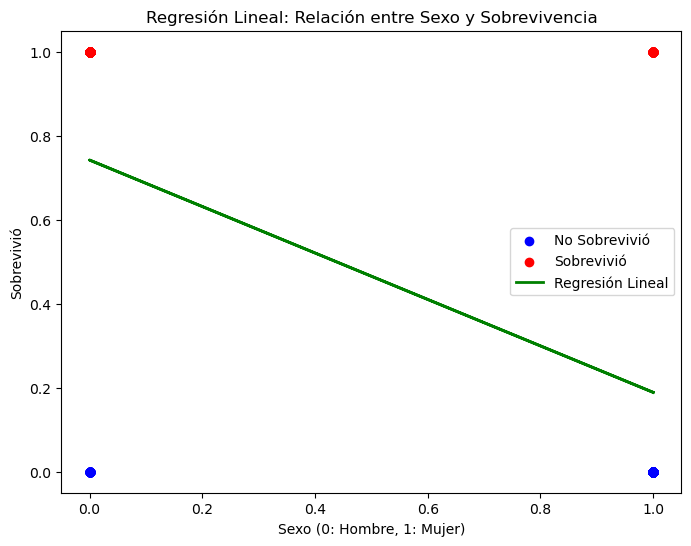

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

# Supongamos que tienes un DataFrame 'data' con las variables 'Sex' y 'Survived'
# Asegúrate de que 'Sex' sea una variable numérica (por ejemplo, codificando 'male' como 0 y 'female' como 1)
le = LabelEncoder()
datos['Sex_encoded'] = le.fit_transform(datos['Sex'])

# Dividir los datos en variables independientes (X) y dependiente (y)
X = datos[['Sex_encoded']]
y = datos['Survived']

# Inicializar y ajustar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X, y)

# Graficar los resultados
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0]['Sex_encoded'], y[y == 0], color='blue', label='No Sobrevivió')
plt.scatter(X[y == 1]['Sex_encoded'], y[y == 1], color='red', label='Sobrevivió')
plt.plot(X, modelo.predict(X), color='green', linestyle='-', linewidth=2, label='Regresión Lineal')
plt.xlabel('Sexo (0: Hombre, 1: Mujer)')
plt.ylabel('Sobrevivió')
plt.title('Regresión Lineal: Relación entre Sexo y Sobrevivencia')
plt.legend()
plt.show()